In [13]:
import pandas as pd
import matplotlib.pyplot as plt

http://resource.npl.co.uk/acoustics/techguides/soundseawater/underlying-phys.html

In [1]:
C00 = 1402.388
C01 = 5.03830
C02 = -5.81090E-2
C03 = 3.3432E-4
C04 = -1.47797E-6
C05 = 3.1419E-9
C10 = 0.153563
C11 = 6.8999E-4
C12 = -8.1829E-6
C13 = 1.3632E-7
C14 = -6.1260E-10
C20 = 3.1260E-5
C21 = -1.7111E-6
C22 = 2.5986E-8
C23 = -2.5353E-10
C24 = 1.0415E-12
C30 = -9.7729E-9
C31 = 3.8513E-10
C32 = -2.3654E-12
A00 = 1.389
A01 = -1.262E-2
A02 = 7.166E-5
A03 = 2.008E-6
A04 = -3.21E-8
A10 = 9.4742E-5
A11 = -1.2583E-5
A12 = -6.4928E-8
A13 = 1.0515E-8
A14 = -2.0142E-10
A20 = -3.9064E-7
A21 = 9.1061E-9
A22 = -1.6009E-10
A23 = 7.994E-12
A30 = 1.100E-10
A31 = 6.651E-12
A32 = -3.391E-13
B00 = -1.922E-2
B01 = -4.42E-5
B10 = 7.3637E-5
B11 = 1.7950E-7
D00 = 1.727E-3
D10 = -7.9836E-6

In [39]:
coefficients = {
    # Chen-Millero
    "C00": 1402.388,
    "C01": 5.03830,
    "C02": -5.81090E-2,
    "C03": 3.3432E-4,
    "C04": -1.47797E-6,
    "C05": 3.1419E-9,
    "C10": 0.153563,
    "C11": 6.8999E-4,
    "C12": -8.1829E-6,
    "C13": 1.3632E-7,
    "C14": -6.1260E-10,
    "C20": 3.1260E-5,
    "C21": -1.7111E-6,
    "C22": 2.5986E-8,
    "C23": -2.5353E-10,
    "C24": 1.0415E-12,
    "C30": -9.7729E-9,
    "C31": 3.8513E-10,
    "C32": -2.3654E-12,
    "A00": 1.389,
    "A01": -1.262E-2,
    "A02": 7.166E-5,
    "A03": 2.008E-6,
    "A04": -3.21E-8,
    "A10": 9.4742E-5,
    "A11": -1.2583E-5,
    "A12": -6.4928E-8,
    "A13": 1.0515E-8,
    "A14": -2.0142E-10,
    "A20": -3.9064E-7,
    "A21": 9.1061E-9,
    "A22": -1.6009E-10,
    "A23": 7.994E-12,
    "A30": 1.100E-10,
    "A31": 6.651E-12,
    "A32": -3.391E-13,
    "B00": -1.922E-2,
    "B01": -4.42E-5,
    "B10": 7.3637E-5,
    "B11": 1.7950E-7,
    "D00": 1.727E-3,
    "D10": -7.9836E-6,
    
    # Delgrosso
    "C000": 1402.392,
    "CT1": 0.5012285E1,
    "CT2": -0.551184E-1,
    "CT3": 0.221649E-3,
    "CS1": 0.1329530E1,
    "CS2": 0.1288598E-3,
    "CP1": 0.1560592,
    "CP2": 0.2449993E-4,
    "CP3": -0.8833959E-8,
    "CST": -0.1275936E-1,
    "CTP": 0.6353509E-2,
    "CT2P2": 0.2656174E-7,
    "CTP2": -0.1593895E-5,
    "CTP3": 0.5222483E-9,
    "CT3P": -0.4383615E-6,
    "CS2P2": -0.1616745E-8,
    "CST2": 0.9688441E-4,
    "CS2TP": 0.4857614E-5,
    "CSTP": -0.3406824E-3
}

In [23]:
def Cw(T, P):
    C = coefficients
    return (
        (C["C00"] + C["C01"]*T + C["C02"]*T**2 + C["C03"]*T**3 + C["C04"]*T**4 + C["C05"]*T**5) +
        (C["C10"] + C["C11"]*T + C["C12"]*T**2 + C["C13"]*T**3 + C["C14"]*T**4)*P +
        (C["C20"] + C["C21"]*T + C["C22"]*T**2 + C["C23"]*T**3 + C["C24"]*T**4)*P**2 +
        (C["C30"] + C["C31"]*T + C["C32"]*T**2)*P**3
    )

def A(T, P):
    C = coefficients
    return (
        (C["A00"] + C["A01"]*T + C["A02"]*T**2 + C["A03"]*T**3 + C["A04"]*T**4) +
        (C["A10"] + C["A11"]*T + C["A12"]*T**2 + C["A13"]*T**3 + C["A14"]*T**4)*P +
        (C["A20"] + C["A21"]*T + C["A22"]*T**2 + C["A23"]*T**3)*P**2 +
        (C["A30"] + C["A31"]*T + C["A32"]*T**2)*P**3
    )

def B(T, P):
    C = coefficients
    return (
        C["B00"] + C["B01"]*T + (C["B10"] + C["B11"]*T)*P
    )

def D(T, P):
    C = coefficients
    return (
        C["D00"] + C["D10"]*P
    )

def sound_velocity(S, T, P):
    Cw_value = Cw(T, P)
    A_value = A(T, P)
    B_value = B(T, P)
    D_value = D(T, P)
    
    return Cw_value + A_value*S + B_value*S**(3/2) + D_value*S**2


In [22]:
# Example of reading from a file
df = pd.read_csv('ARCA DIVE.txt', sep="\s+", header=None)

Pressure = df[0].values         # db
Temperature = df[1].values      # deg C
Conductivity = df[2].values     # S/m
nbin = df[3].values             # number of scans per bin
rho = df[4].values              # kg/m^3
Salinity = df[5].values         # PSU
Depth = df[6].values            # m
v_D = df[7].values              # m/s
v_CM = df[8].values             # m/s
flag = df[9].values             # flag

In [50]:
check = []

for i in range(0, len(P)):
    Sal = Salinity[i]
    Tem = Temperature[i]
    Pre = Pressure[i] / 10
    
    sound_speed = sound_velocity(Sal, Tem, Pre)
    check.append(sound_speed)

(1400.0, 1570.0)

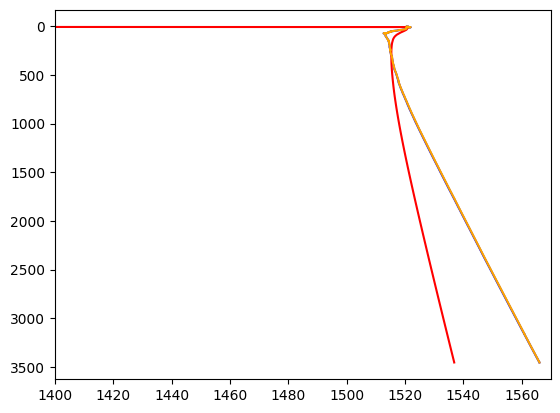

In [51]:
plt.plot(v_D, Depth, color="blue")
plt.plot(v_CM, Depth, color="red")
plt.plot(check, Depth, color="orange")

plt.gca().invert_yaxis()
plt.xlim(1400, 1570)

In [36]:
def delta_CT(T):
    CT1 = coefficients["CT1"]
    CT2 = coefficients["CT2"]
    CT3 = coefficients["CT3"]
    return CT1 * T + CT2 * T**2 + CT3 * T**3

def delta_CS(S):
    CS1 = coefficients["CS1"]
    CS2 = coefficients["CS2"]
    return CS1 * S + CS2 * S**2

def delta_CP(P):
    CP1 = coefficients["CP1"]
    CP2 = coefficients["CP2"]
    CP3 = coefficients["CP3"]
    return CP1 * P + CP2 * P**2 + CP3 * P**3

def delta_CSTP(S, T, P):
    CST = coefficients["CST"]
    CTP = coefficients["CTP"]
    CT2P2 = coefficients["CT2P2"]
    CTP2 = coefficients["CTP2"]
    CTP3 = coefficients["CTP3"]
    CT3P = coefficients["CT3P"]
    CS2P2 = coefficients["CS2P2"]
    CST2 = coefficients["CST2"]
    CS2TP = coefficients["CS2TP"]
    CSTP = coefficients["CSTP"]
    
    return (CTP * T * P + CT3P * T**3 * P + CTP2 * T * P**2 + 
            CT2P2 * T**2 * P**2 + CTP3 * T * P**3 + CST * S * T + 
            CST2 * S * T**2 + CSTP * S * T * P + CS2TP * S**2 * T * P + 
            CS2P2 * S**2 * P**2)

In [56]:
check2 = []

for i in range(0, len(P)):
    Sal = Salinity[i]
    Tem = Temperature[i]
    Pre = Pressure[i] / 10
    C000 = coefficients["C000"]
    
    C_S_T_P = C000 + delta_CT(Tem) + delta_CS(Sal) + delta_CP(Pre) + delta_CSTP(Sal, Tem, Pre)
    sound_speed = sound_velocity(Sal, Tem, Pre)
    check2.append(sound_speed)

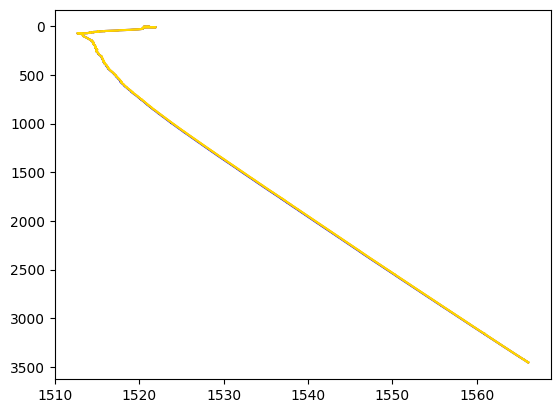

In [59]:
plt.plot(v_D, Depth, color="blue")
#plt.plot(v_CM, Depth, color="red")
plt.plot(check, Depth, color="orange")
plt.plot(check2, Depth, color="gold")

plt.gca().invert_yaxis()
#plt.xlim(1400, 1570)

In [68]:
difference = [i - j for i, j in zip(check2, v_D)]
print(max(difference))

print(sum(difference))

0.10893324639005186
244.6685860124894
